# Telco Customer Churn Dataset - Exploratory Data Analysis

Explore the dataset of Telco Customer Churn in order to uncover patterns in the data and correlation between features/label.

# Setup Notebook

## Import

In [1]:
# Import Standard Libraries
import pandas as pd

import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from colorama import Style, Fore

# Import Package Modules
from src.general_utils.general_utils import read_configuration

## Setup Plots Characteristics

In [2]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

In [3]:
# Define Colors
black = Style.BRIGHT + Fore.BLACK
magenta = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blue = Style.BRIGHT + Fore.BLUE
reset_colors = Style.RESET_ALL

## Define Configuration

In [4]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[0]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'config.yaml')

# Extract configuration variables
dataset_config = config['dataset']

[05/26/2024 17:59:08 - general_utils] INFO - read_configuration - Start
[05/26/2024 17:59:08 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/customer_churn_predictor/configuration/config.yaml
[05/26/2024 17:59:08 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/customer_churn_predictor/configuration/config.yaml read successfully
[05/26/2024 17:59:08 - general_utils] INFO - read_configuration - End


# Read Data

In [5]:
# Read data
data = pd.read_csv(root_path.as_posix() + '/' + dataset_config['path'])

# Exploratory Data Analysis

## General

### Data Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Most of the features seem categorical &rarr; Encoding techniques might increase the data size

### Sample Data

In [7]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4855,0868-VJRDR,Male,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.05,6605.55,No
5768,8679-LZBMD,Male,0,Yes,No,44,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),90.65,3974.15,No
3405,0744-GKNGE,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),86.80,5327.25,No
5921,0068-FIGTF,Female,0,No,No,27,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,78.20,2078.95,No
5699,6719-OXYBR,Male,0,No,No,15,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,85.30,1219.85,No


### Shape

In [8]:
# Print shapes information
print(f'{blue}Data Shapes:'
      f'{blue}\n- All Data -> {red}{data.shape}\n')

Data Shapes:
- All Data -> (7043, 21)



### Null Values

In [9]:
# Print null values information
print(f'{blue}Data Columns with Null Values:'
      f'{blue}\n- All Data -> {red}{data.isnull().any().sum()}\n')

Data Columns with Null Values:
- All Data -> 0



- No null values &rarr; Imputation step not necessary

### TotalCharges

This column, although it seems to have float values, it's of type `Object`.

In [20]:
# Identify the object values
def is_float(value):
    """
    Checks if a value is a float
    
    :param value: Value to be checked
    :return: True or False
    """
    try:
        float(value)
        return True
    except ValueError:
        return False

In [25]:
# Apply the function to the column and create a mask for non-float values
non_float_mask = ~data['TotalCharges'].apply(is_float)

# Retrieve the values that are not floats
non_float_values = data[non_float_mask]

# Display the non-float values
print(non_float_values['TotalCharges'].unique())

[' ']


Some values of `TotalCharges` are just spaces string. That could be because the customer is new and the `MonthlyCharges` might have not yet been charged. Let's see the `tenure` values for confirming this theory or to uncover a data quality issue.

In [26]:
# Display the 'tenure' values non-float 'TotalCharges' values
print(non_float_values['tenure'].unique())

[0]


Hypothesis has been confirmed: they are all new customers. Let's replace that `TotalCharges` space string with a zero then.

In [27]:
# Replace spaces with 0
data['TotalCharges'] = data['TotalCharges'].replace(' ', '0')

In [28]:
# Convert the column to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

## Feature Distribution

### Numerical Feature Distribution

In [29]:
# Define raw numerical features
raw_numerical_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

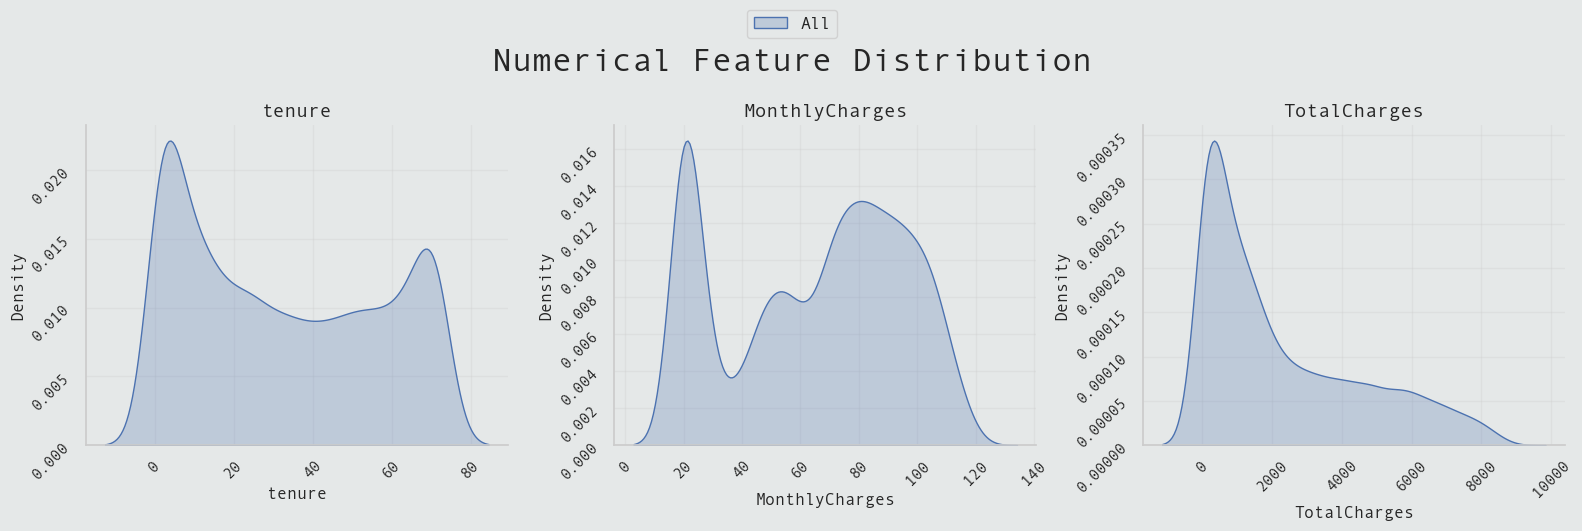

In [30]:
# Define figure and axis
figure, ax = plt.subplots(1, 3, figsize=(16, 5))
ax = ax.flatten()

# Initialise legend information
handles, labels = None, None

# Fetch the data to plot
for index, column_name in enumerate(raw_numerical_features):
    
    # Plot data
    sns.kdeplot(data=data[column_name],
                fill=True,
                label='All',
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)

    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=3)

# Set figure Title
figure.suptitle('Numerical Feature Distribution',
                fontweight='bold',
                fontsize=24)

plt.tight_layout()

- Scale are quite different &rarr; Apply Standardisation
- `TotalCharges` has a binomial distribution

### Categorical Feature Distrubtion

In [31]:
# Define raw categorical features
raw_categorical_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

#### Count Unique Values per Categorical Feature

In [32]:
# Count unique values
data[raw_categorical_features].apply(pd.Series.nunique).rename('Unique Values').sort_values(ascending=False)

PaymentMethod       4
InternetService     3
MultipleLines       3
OnlineSecurity      3
DeviceProtection    3
TechSupport         3
OnlineBackup        3
StreamingTV         3
Contract            3
StreamingMovies     3
PhoneService        2
Dependents          2
gender              2
SeniorCitizen       2
Partner             2
PaperlessBilling    2
Name: Unique Values, dtype: int64

- All the categorical features have the expected number of unique values

#### Count Values per Categorical Feature

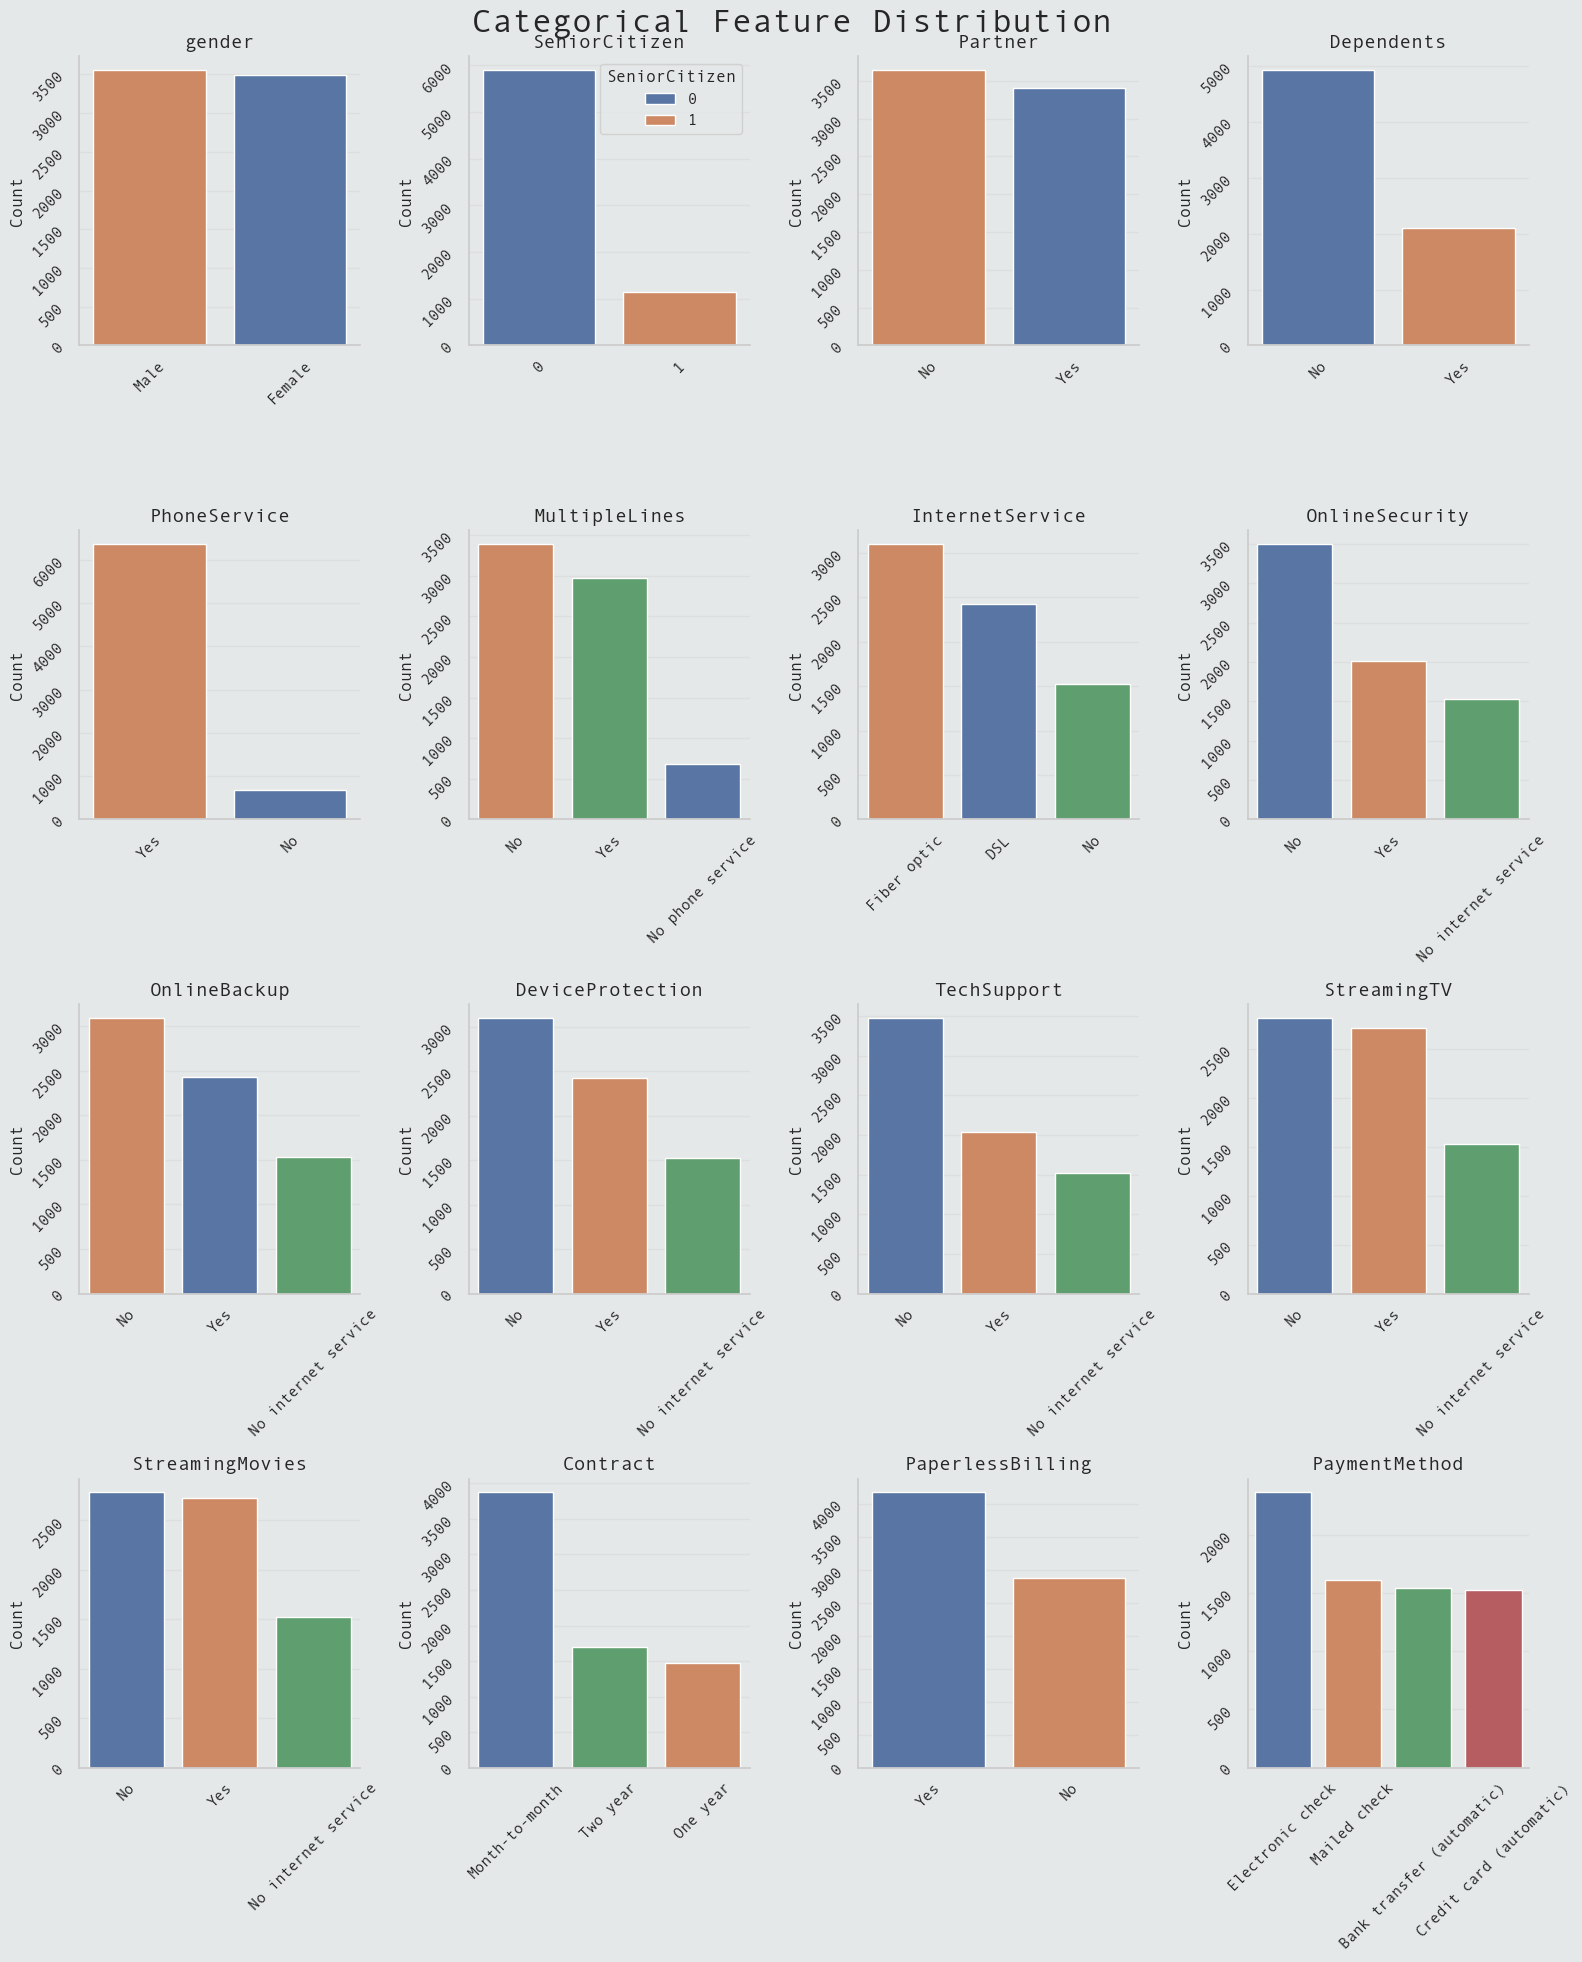

In [36]:
# Define the figure and axis
figure, ax = plt.subplots(4, 4, figsize=(16, 20))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(raw_categorical_features):
        
    # Plot data
    sns.countplot(data=data,
                  x=column_name,
                  order=data[column_name].value_counts().index,
                  hue=column_name,
                  ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)
    
    # Set labels
    ax[index].set_xlabel('')
    ax[index].set_ylabel('Count')

# Set figure Title
figure.suptitle('Categorical Feature Distribution',
                fontweight='bold',
                fontsize=24)

plt.tight_layout()

- Most of the features are equally distributed &rarr; `PhoneService` and `SeniorCitizen` are skewed distributed

## Label Distribution

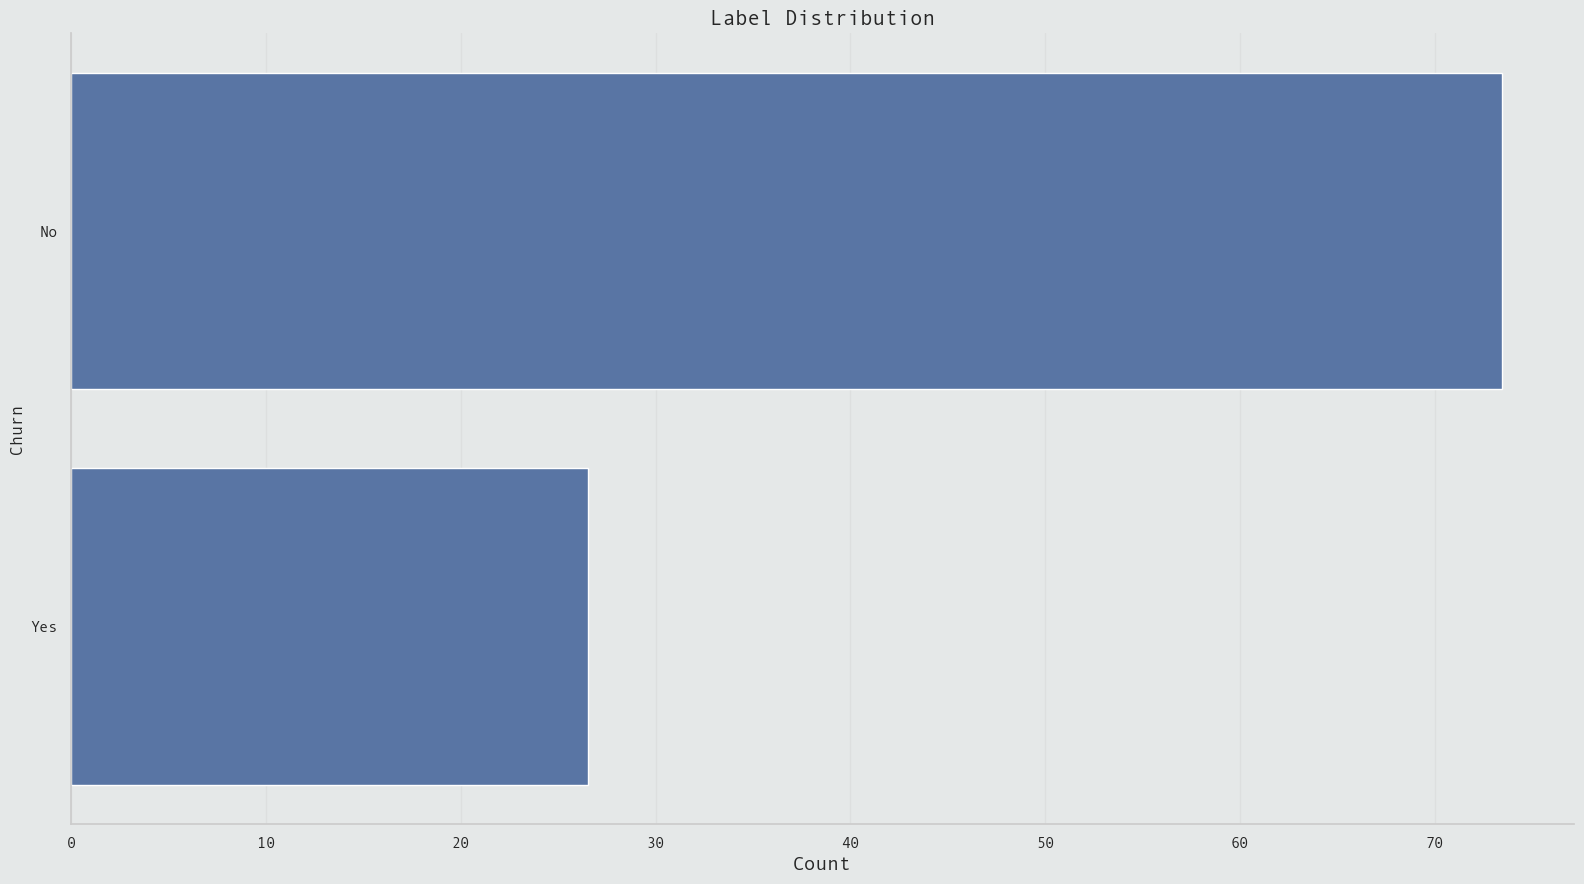

In [38]:
# Define figure and axes
figure, ax = plt.subplots(1, 1, figsize=(16, 9))

# Plot data
sns.countplot(data=data, 
              y='Churn', 
              orient='v',
              stat='percent',
              order=data['Churn'].value_counts().index)


# Set plot titles
ax.set_title('Label Distribution', fontsize=15)

# Set Labels
ax.set_xlabel('Count', fontsize=14)

plt.tight_layout()

- There is, as expected, a problem of imbalanced classes &rarr; Do not rely on accuracy metrics + use a cross-validation with `StratifiedKFold`